In [36]:
import requests
import lxml.etree as ET
import io

## Objectifs

Récupérer des informations sur les condordances/concordanciers/concordantia dans le catalogue de la BnF

In [107]:
def get_page(start_record=1):
    URI = 'https://catalogue.bnf.fr/api/SRU' \
      '?version=1.2&operation=searchRetrieve&recordSchema=dublincore&startRecord={}' \
      '&maximumRecords=500&query={}'.format(
            start_record,
            " or ".join([
                'bib.title all "{}"'.format(concordance_variante) for concordance_variante in [
                  "concordant*", "concordanc*"
                ]
            ])
    )
    data = requests.get(URI)
    print(URI)
    text = io.BytesIO(data.content)
    doc = ET.parse(text)
    for record in doc.xpath("//oai:dc", namespaces={"oai": "http://www.openarchives.org/OAI/2.0/oai_dc/"}):
        yield (
            [el.text for el in record.xpath("./dc:date", namespaces={"dc": "http://purl.org/dc/elements/1.1/"})],
            [el.text for el in record.xpath("./dc:language", namespaces={"dc": "http://purl.org/dc/elements/1.1/"})]
        )
    next_page = doc.xpath("//srw:nextRecordPosition", namespaces={"srw": "http://www.loc.gov/zing/srw/"})
    if next_page:
        yield from get_page(next_page[0].text)

In [108]:
dates = []
languages = []

for date, lg in get_page():
    dates.append(date)
    languages.append(lg)

print(print(len(dates)))

https://catalogue.bnf.fr/api/SRU?version=1.2&operation=searchRetrieve&recordSchema=dublincore&startRecord=1&maximumRecords=500&query=bib.title all "concordant*" or bib.title all "concordanc*"
https://catalogue.bnf.fr/api/SRU?version=1.2&operation=searchRetrieve&recordSchema=dublincore&startRecord=501&maximumRecords=500&query=bib.title all "concordant*" or bib.title all "concordanc*"
https://catalogue.bnf.fr/api/SRU?version=1.2&operation=searchRetrieve&recordSchema=dublincore&startRecord=1001&maximumRecords=500&query=bib.title all "concordant*" or bib.title all "concordanc*"
https://catalogue.bnf.fr/api/SRU?version=1.2&operation=searchRetrieve&recordSchema=dublincore&startRecord=1501&maximumRecords=500&query=bib.title all "concordant*" or bib.title all "concordanc*"
https://catalogue.bnf.fr/api/SRU?version=1.2&operation=searchRetrieve&recordSchema=dublincore&startRecord=2001&maximumRecords=500&query=bib.title all "concordant*" or bib.title all "concordanc*"
https://catalogue.bnf.fr/api/

## Stats

In [109]:
# Save !
import json
if True is False:  # Safety first !
    with open("1.4.1 - Concordances.json", "w") as f:
        json.dump({"dates": dates, "languages": languages}, f)

In [110]:
# Load !
with open("1.4.1 - Concordances.json") as f:
    data = json.load(f)
    dates = data["dates"]
    languages = data["languages"]

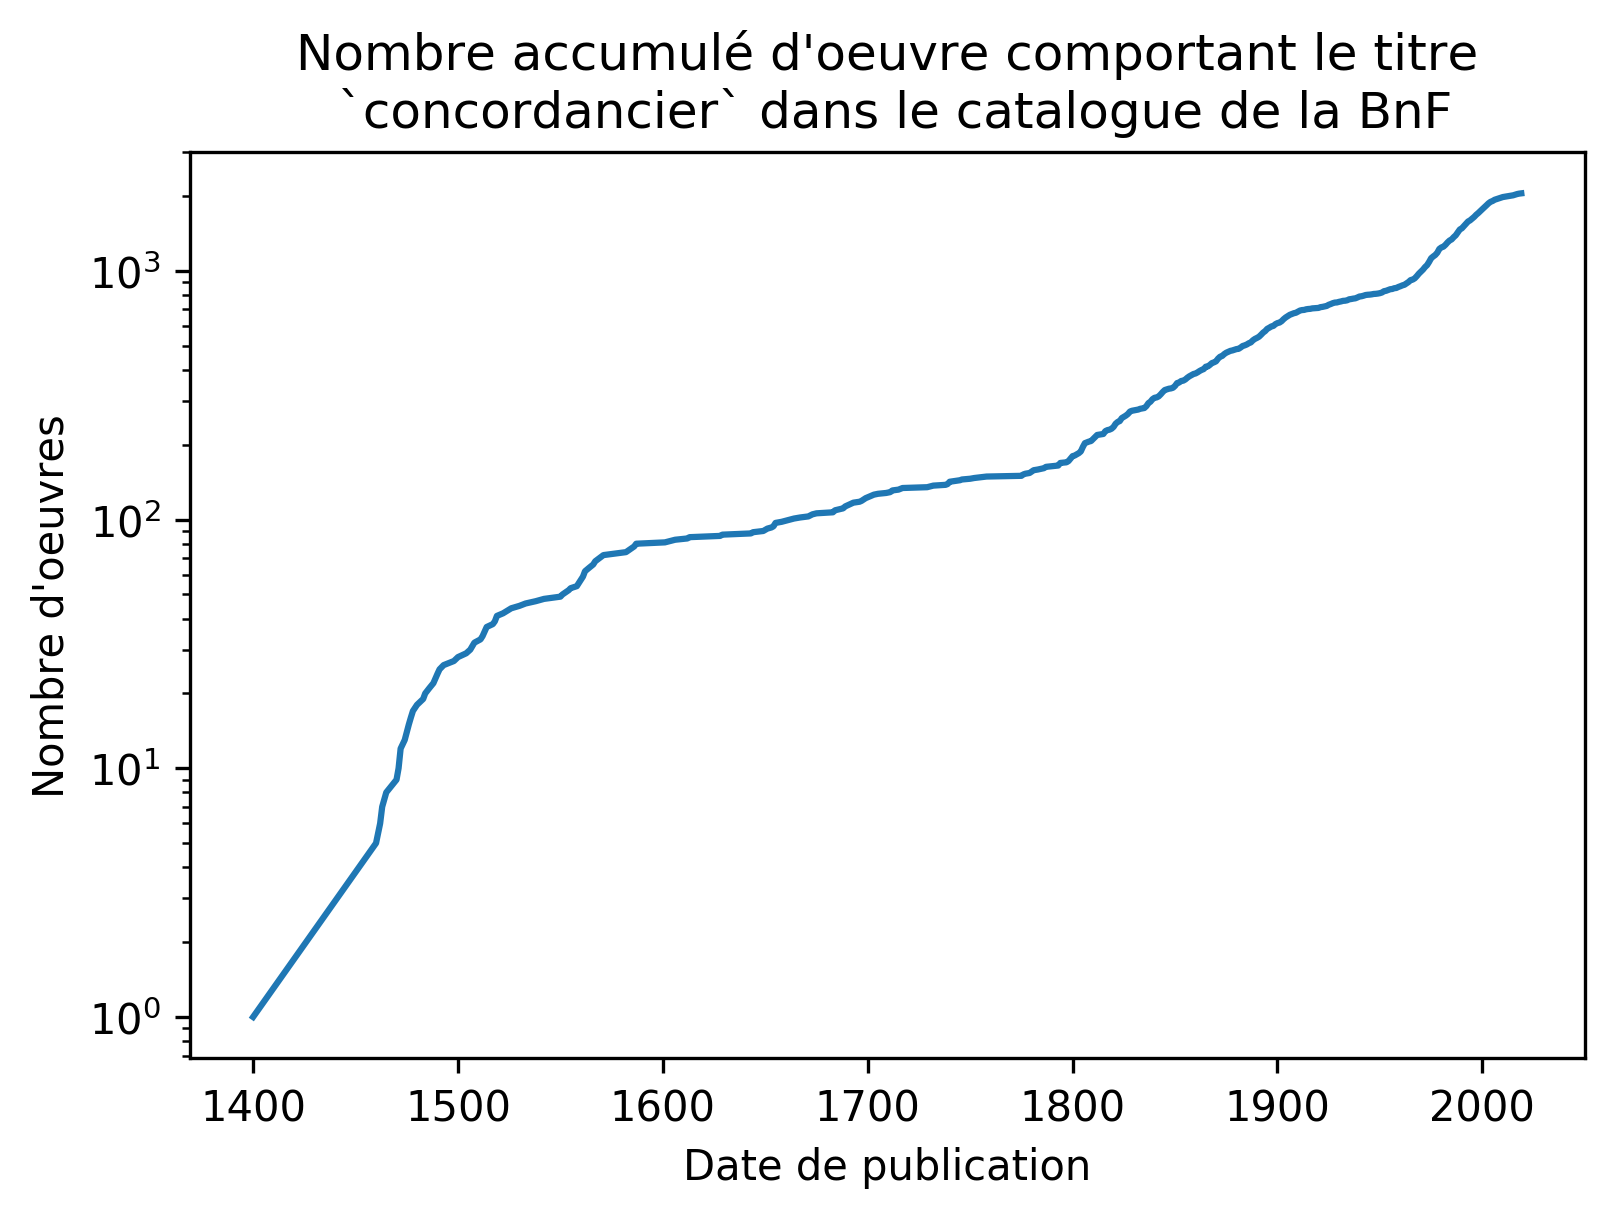

In [111]:
import pandas as pd
import matplotlib

dates_int = [
    int(d.split("-")[0].replace("?", "0").replace(".", "0"))
    for date in dates
    for d in date
    if d
]
dates_int = sorted([d for d in dates_int if d >= 1400 and d<=2020])
new_dates = [
    {
        "date": d,
        "acc": len(list(filter(lambda x: x<=d, dates_int)))
    }
    for d in dates_int
]


dates_serie = pd.DataFrame(new_dates)
plot = dates_serie.plot(x="date", y="acc", logy=True)
plot.set_title("Nombre accumulé d'oeuvre comportant le titre\n `concordancier` dans le catalogue de la BnF")
plot.set_ylabel("Nombre d'oeuvres")
plot.set_xlabel("Date de publication")
plot.get_legend().remove()
plot.get_figure().set_dpi(300)